# Objective

Analyze average total body NNDs with amphora Y114 as reference. 

New visualization types:
- Set average NNDs as negative if the jar is smaller than Y114.
- Show max diameters (when available) alongside average NNDs

# Notes on Max Diameter and Capacity Data

All capacity data is physically measured data. Most max diameter data is physically measured data. 

Since physically measured max diameters were unavailable for the wide band jars, these measurements were taken using CloudCompare. When I checked the jars that have physically measured diameters available, to see whether these physically measured diameters match with the diameter measurements from CloudCompare, I found that max diameters found in CloudCompare are for some reason consistently 1 mm less than physically measured diameters. Therefore, to get the max diameters shown here for the wide band jars, I added 1 mm to the max diameters I found in CloudCompare.

# Results

All checks out logically. Major takeaways:
- When average NNDs are set as negative (if the jar is smaller than 86-93), groups stay together, and in fact groupings by type/color are more tightly distributed than they were before.
    - This might be a more intuitive way of presenting the data.
- Delta diameter and capacity seem to parallel NND in varying with the reference jar.

In [1]:
import sys
sys.path.insert(0,'../../../')
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

# Inputs

In [2]:
compare = ['83-2',
            '84-1',
            '84-3',
            '84-10',
            '86-38',
            '86-45',
            '86-75',
            '86-85',
            '86-90',
            '86-92',
            '86-93',
            '86-95',
            '86-96',
            '86-99',
            '86-100',
            '86-113',
            'C',
            'D',
            'F',
            'UN16',
            'W1',
            'W8',
            'W43',
            'W55',
            'W63',
            'W69',
            'W70',
            'W74',
            'W77',
            'X5',
            'X12',
            'Y2',
            'Y7',
            'Y11',
            'Y12',
            'Y14',
            'Y15',
            'Y22',
            'Y28',
            'Y32',
            'Y34',
            'Y39',
            'Y45',
            'Y52',
            'Y123',
            'Y126',
            'Y127',
            'Y128',
            'Y135',
            'Y148',
            'Y149']
ref = 'Y114'
path_to_models = './bodies_registered/'
path_to_ref = './body_reference/'
save_distances = True
ref_csv_path = './body_reference_cleaned/YA7_' + ref + '_body.csv'

# Comparison

Calculated average NNDs if not previously calculated.

In [4]:
average_distances = []
stdev_distances = []
for model in compare:
    
    print(model) # so the user can see which segment the code is working on
    
    model_csv_path = './bodies_registered_cleaned/YA7_' + model + '_body.csv'
    dist_path = './bodies_distances/' + ref + '_' + model + '_distances.csv'
    
    average_distance, stdev_distance = util.get_avg_cc_dist(ref_csv_path, model_csv_path, save_distances, dist_path)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

Load average NNDs if previously calculated.

In [5]:
average_distances = np.genfromtxt('average_distances_y114.csv', delimiter=',')

Load physical and measured data.

In [7]:
group_data = pd.read_csv('../../../bodies_to_Y114/bodies_group_data_y114.csv', index_col=0)

In [21]:
diameter_y114 = 41.9
capacity_y114 = 35.97

In [9]:
average_distances_signed = []
for distance, diameter in zip(average_distances, list(group_data.diameter)):
    if diameter < diameter_y114:
        average_distances_signed.append(distance*-1)
    else:
        average_distances_signed.append(distance)

# Morphological difference with Y114 across the dataset

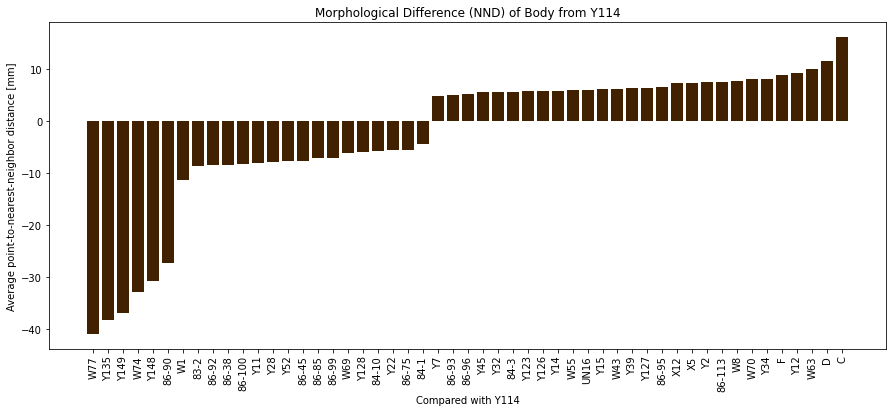

In [10]:
# order the compared amphoras by avg NND to ref amphora
compare_sorted = [x for _,x in sorted(zip(average_distances_signed, compare))]
average_distances_sorted = sorted(average_distances_signed)

fig, ax = plt.subplots(figsize = (15, 6))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color='#412100')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with %s' % ref)
ax.set_ylabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_title('Morphological Difference (NND) of Body from %s' % ref)
plt.xticks(rotation='vertical')
plt.show()

# Coloring by group

#### Assign a color to each group.

In [11]:
color_dict = {'Spiral combed - main group': '#412100',
              'Spiral combed - main group - ring lip': 'xkcd:violet',
              'Spiral combed - fractional': 'xkcd:tan',
              'Spiral combed - massive neck, massive diagonal handles': 'xkcd:red',
              'Spiral combed - massive neck, massive vertical handles': 'xkcd:orange',
              'Spiral combed - outlier?': 'xkcd:green',
              'Wide band of combing/squared handles': 'xkcd:blue' 
             }

In [12]:
labels = list(group_data.group)
colors = [color_dict[label] for label in labels]

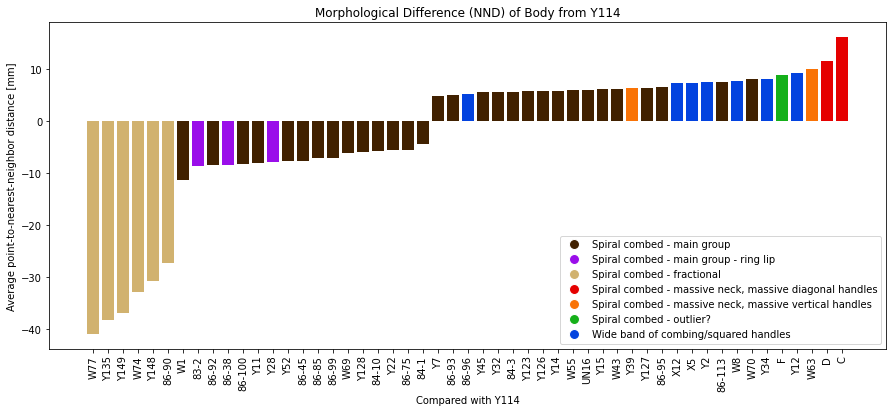

In [13]:
colors_sorted = [x for _,x in sorted(zip(average_distances_signed, colors))]

fig, ax = plt.subplots(figsize = (15, 6))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color=colors_sorted)
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with %s' % ref)
ax.set_ylabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_title('Morphological Difference (NND) of Body from %s' % ref)
plt.xticks(rotation='vertical')

handle_list = []
for label in color_dict:
    handle_list.append(Line2D([0],[0], marker='o', color='w', markersize=10,
                              markerfacecolor=color_dict[label], label=label))

plt.legend(handles=handle_list, loc='lower right')

plt.show()

#### Note: The two plots in this notebook are the same. The second one is simply colorized for ease of interpretation.

## Get absolute and delta max diameters

In [45]:
diameters = list(group_data.diameter)
diameters_signed = []
for diameter in diameters:
    if diameter < diameter_y114:
        diameters_signed.append(diameter*-1)
    else:
        diameters_signed.append(diameter)
diameters_sorted = [x for _,x in sorted(zip(average_distances_signed, diameters_signed))]
diameters_sorted_deltas = [abs(x) - diameter_y114 for x in diameters_sorted]

## Get absolute and delta capacities

In [50]:
capacities = list(group_data.capacity)
capacities_signed = []
for capacity in capacities:
    if capacity < capacity_y114:
        capacities_signed.append(capacity*-1)
    else:
        capacities_signed.append(capacity)
capacities_sorted = [x for _,x in sorted(zip(average_distances_signed, capacities_signed))]

capacities_sorted_deltas = []
for x in capacities_sorted:
    if x==0:
        capacities_sorted_deltas.append(0)
    else:
        capacities_sorted_deltas.append(abs(x) - capacity_y114)

# Plot with max diameter (and without capacity)

Excluding capacity since capacity is not available for all jars. Scroll further for plot that includes max diameter and capacity.

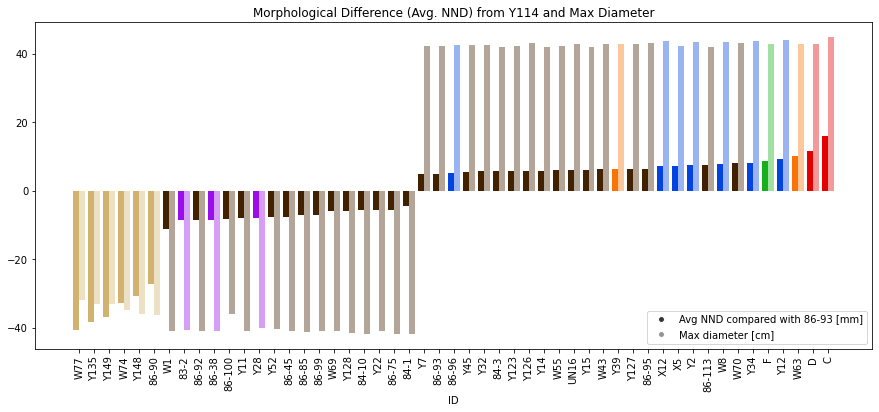

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.4
s = 0.2

ax.bar(x_pos-s, average_distances_sorted,width=w,color=colors_sorted,align='center')
ax.bar(x_pos+s, diameters_sorted,width=w,color=colors_sorted,alpha=0.4,align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:dark grey', label='Avg NND compared with 86-93 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:grey', label='Max diameter [cm]')]
plt.legend(handles=handle_list, loc='lower right')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from Y114 and Max Diameter')
plt.xticks(rotation='vertical')
plt.show()

# Plot with delta max diameter (and without delta capacity)

Excluding delta capacity since capacity is not available for all jars. Scroll further for plot that includes delta max diameter and delta capacity.

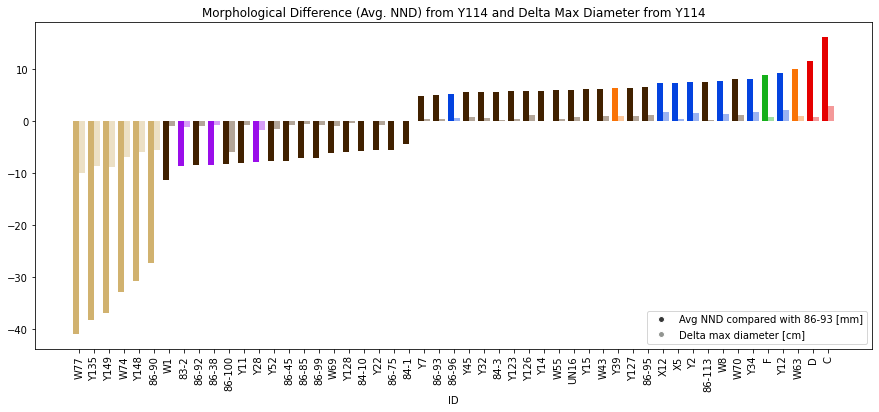

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.4
s = 0.2

ax.bar(x_pos-s, average_distances_sorted,width=w,color=colors_sorted,align='center')
ax.bar(x_pos+s, diameters_sorted_deltas,width=w,color=colors_sorted,alpha=0.4,align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:dark grey', label='Avg NND compared with 86-93 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:grey', label='Delta max diameter [cm]')]
plt.legend(handles=handle_list, loc='lower right')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from Y114 and Delta Max Diameter from Y114')
plt.xticks(rotation='vertical')
plt.show()

# Plot with max diam and capacity

(Capacity data presented wherever available)

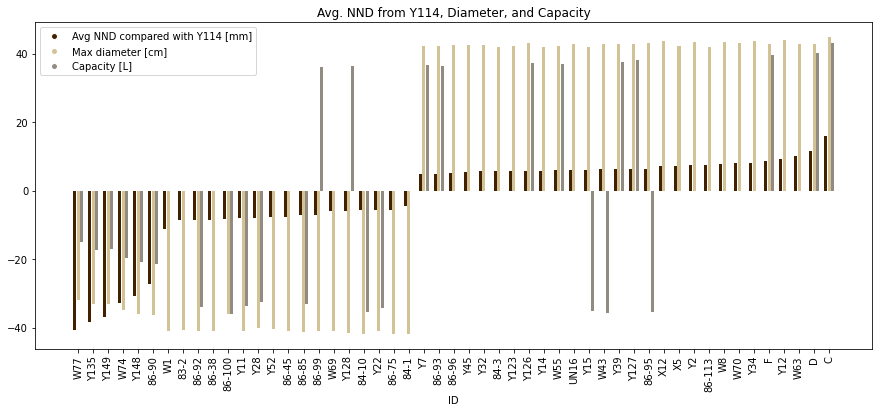

In [47]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, average_distances_sorted,width=w,color='#412100',align='center')
ax.bar(x_pos, diameters_sorted, width=w,color=colors[0],align='center')
ax.bar(x_pos+w+s, capacities_sorted, width=w,color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with Y114 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Max diameter [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Capacity [L]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Avg. NND from Y114, Diameter, and Capacity')
plt.xticks(rotation='vertical')
plt.show()

Observations of the above: 
- There are two jars where shape and diameter are slightly smaller than ref shape and ref diameter, but capacity is slightly larger than ref capacity.
- There are three jars where shape and diameter are slightly larger than ref shape and ref diameter, but capacity is slightly smaller than ref capacity.
- This is not surprising, and other than that, all is as expected.

# Plot with delta max diam and delta capacity

(Volume data presented where available)

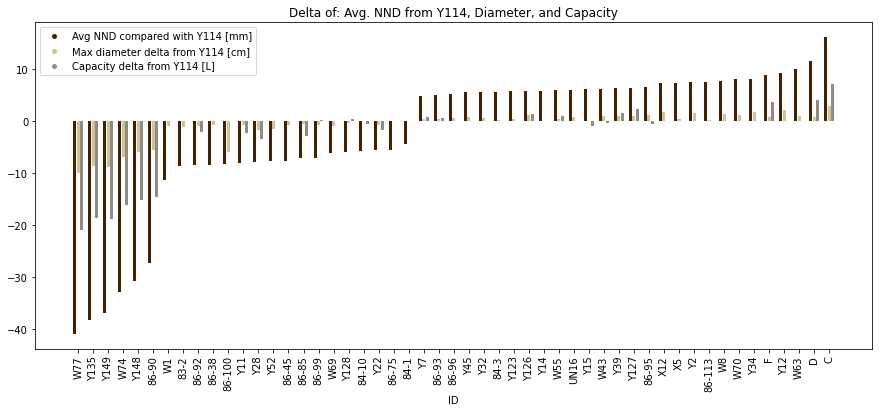

In [52]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, average_distances_sorted,width=w,color='#412100',align='center')
ax.bar(x_pos, diameters_sorted_deltas, width=w,color=colors[0],align='center')
ax.bar(x_pos+w+s, capacities_sorted_deltas, width=w,color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with Y114 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Max diameter delta from Y114 [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Capacity delta from Y114 [L]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Delta of: Avg. NND from Y114, Diameter, and Capacity')
plt.xticks(rotation='vertical')
plt.show()

In [18]:
print('\nmodel\taverage distance from %s [mm]\n' % ref)
for model, average_distance in zip(compare, average_distances):
    print(model, '\t', average_distance)


model	average distance from Y114 [mm]

83-2 	 8.726276758287831
84-1 	 4.464359371111168
84-3 	 5.595368984140354
84-10 	 5.75625234558756
86-38 	 8.491776048277803
86-45 	 7.620121325137664
86-75 	 5.534394097323418
86-85 	 7.197415199771741
86-90 	 27.32046680601839
86-92 	 8.529635681005592
86-93 	 4.9377891447612905
86-95 	 6.437389492007788
86-96 	 5.193057256987434
86-99 	 7.196085941518235
86-100 	 8.241867430352055
86-113 	 7.527297746540627
C 	 16.05902167269092
D 	 11.538999484305533
F 	 8.78263559967838
UN16 	 5.964524384928421
W1 	 11.276513106946702
W8 	 7.720642332990327
W43 	 6.179165523820197
W55 	 5.928636658685303
W63 	 10.043363583774875
W69 	 6.058613617825753
W70 	 7.957341309398561
W74 	 32.89945099540026
W77 	 40.82629779752609
X5 	 7.31196226822658
X12 	 7.259578585874153
Y2 	 7.499596257651231
Y7 	 4.746246526300091
Y11 	 8.089633449654542
Y12 	 9.217772251554146
Y14 	 5.80399737754781
Y15 	 6.100658065201263
Y22 	 5.645095778859881
Y28 	 7.955590944875967
Y32